# Task 6.5 Unsupervised Machine Learning: Clustering

## Contents
    01.Importing Libraries & Data
    02.Data Cleaning
    03.Elbow Technique
    04.K-means Clustering
    05.Discussing the Results

### 01.Importing Libraries & Data

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
#defining path to project folder
path=r'C:\Users\rache\Documents\House Sales Analysis'

In [137]:
#importing house_sales_upd2.pkl
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_upd2.pkl'))

### 02.Data Cleaning

In [5]:
df.shape

(21613, 23)

In [76]:
df.head()

,Index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Home Size Category
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,False,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Small
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Moderate
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Small
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Moderate
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Small


In [138]:
df.columns

Index(['Index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Home Size Category'],
      dtype='object')

In [139]:
#dropping the columns that are not needed for clustering
df_clean=df.drop(['Index','id','date','waterfront','view','condition', 'grade','sqft_above','sqft_basement','yr_renovated','lat','long','sqft_living15', 'sqft_lot15','Home Size Category'],axis = 1)

In [140]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
0,221900,3,1.00,1180,5650,1.0,1955,98178
1,538000,3,2.25,2570,7242,2.0,1951,98125
2,180000,2,1.00,770,10000,1.0,1933,98028
3,604000,4,3.00,1960,5000,1.0,1965,98136
4,510000,3,2.00,1680,8080,1.0,1987,98074
...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,2009,98103
21609,400000,4,2.50,2310,5813,2.0,2014,98146
21610,402101,2,0.75,1020,1350,2.0,2009,98144
21611,400000,3,2.50,1600,2388,2.0,2004,98027


### 03.Elbow Technique

In [141]:
num_cl=range(1, 10) #Defines the range of potential clusters in the data.
kmeans=[KMeans(n_clusters=i) for i in num_cl] #Defines k-means clusters in the range assigned above.

In [142]:
score=[kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.
score

[-2950013890352985.5,
 -1391646159544719.8,
 -767140190194726.0,
 -497536543598769.44,
 -360865229042883.56,
 -274248808291762.7,
 -215789662182506.84,
 -172374887623706.5,
 -146886483944487.28]

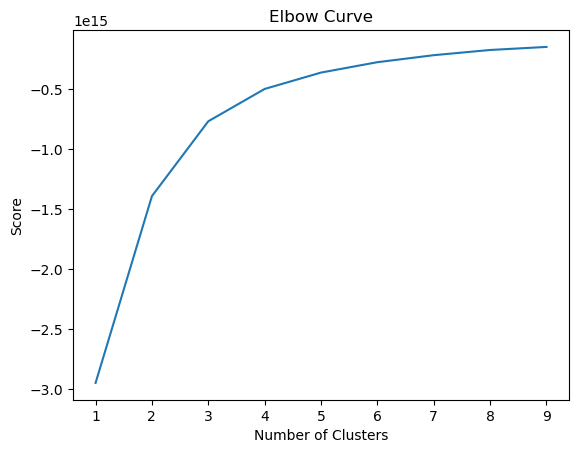

In [143]:
#plotting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The "elbow" starts to straighten around 5 so the cluster count will be 5.

### 04.K-means Clustering

In [144]:
#creating the k-means object
kmeans=KMeans(n_clusters = 5) 

In [145]:
#fitting the k-means object to the data
kmeans.fit(df_clean)

KMeans(n_clusters=5)

In [146]:
df_clean['clusters'] = kmeans.fit_predict(df_clean)

In [147]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,clusters
0,221900,3,1.00,1180,5650,1.0,1955,98178,0
1,538000,3,2.25,2570,7242,2.0,1951,98125,3
2,180000,2,1.00,770,10000,1.0,1933,98028,0
3,604000,4,3.00,1960,5000,1.0,1965,98136,3
4,510000,3,2.00,1680,8080,1.0,1987,98074,3


In [148]:
df_clean['clusters'].value_counts()

0    9096
3    7670
2    3724
1     946
4     177
Name: clusters, dtype: int64

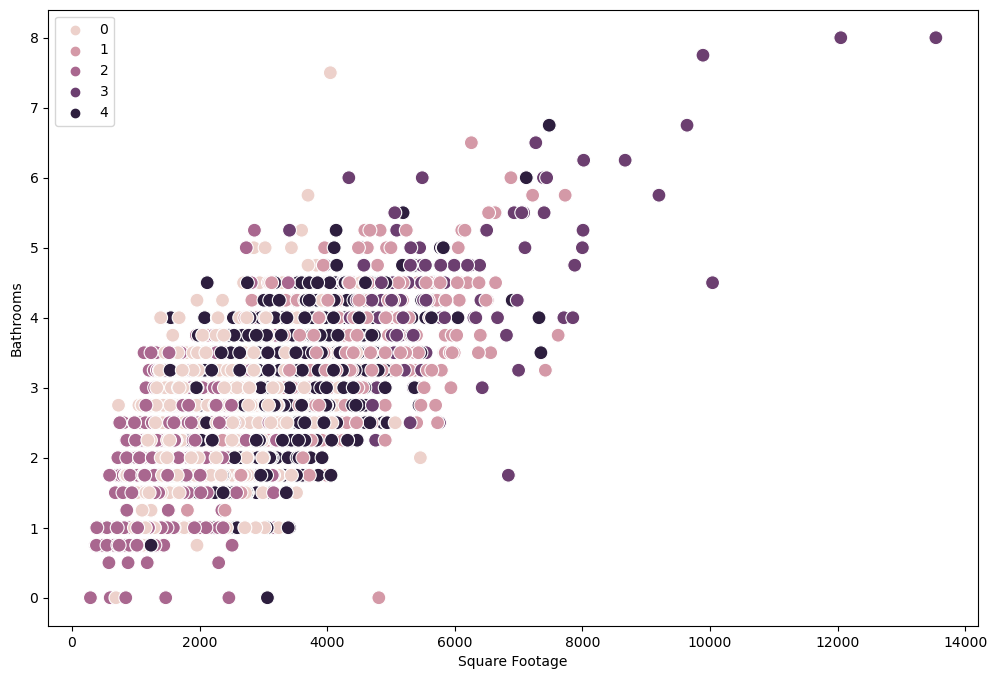

In [126]:
#plotting the clusters for the "bathrooms" and "sqft_living" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['bathrooms'], hue=kmeans.labels_, s=100) 
ax.grid(False) #this removes the grid from the background
plt.xlabel('Square Footage')
plt.ylabel('Bathrooms')
plt.show()

The clusters do not entirely follow a clear pattern. Clusters 1 and 3 tend to be on the higher end of square footage and number of bathrooms. Clusters 0 and 2 seem to be on the lower end of both variables and cluster 4 is in the middle.

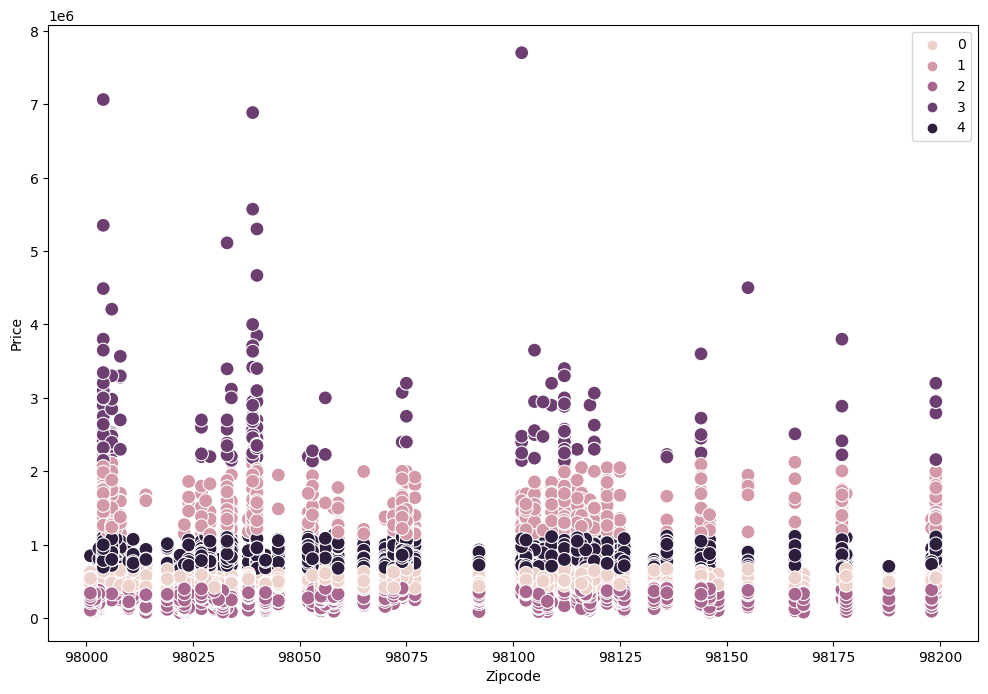

In [127]:
#plotting the clusters for the "zipcode" and "price" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['zipcode'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Zipcode') 
plt.ylabel('Price') 
plt.show()

The clusters are similar in distribution as the previous chart. 1 and 3 are generally higher in price while 0 and 2 are generally lower in price with 4 being usually in the middle.  Each column of points follows generally the same pattern of clusters across all zipcodes.

In [149]:
df_clean.loc[df_clean['clusters'] == 4, 'cluster'] = 'dark purple'
df_clean.loc[df_clean['clusters'] == 3, 'cluster'] = 'purple'
df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'mauve'
df_clean.loc[df_clean['clusters'] == 1, 'cluster'] = 'pink'
df_clean.loc[df_clean['clusters'] == 0, 'cluster'] = 'blush'

In [150]:
df_clean.groupby('cluster').agg({'price':['mean', 'median'],'bedrooms':['mean', 'median'],'bathrooms':['mean', 'median'],
                                 'sqft_living':['mean', 'median'],'sqft_lot':['mean', 'median'],'floors':['mean', 'median'],
                                 'yr_built':['mean', 'median'],'zipcode':['mean', 'median']})

price             bedrooms        bathrooms         \
                     mean     median      mean median      mean median   
cluster                                                                  
blush        2.971660e+05   300000.0  3.109279    3.0  1.775643   1.75   
dark purple  2.855597e+06  2555000.0  4.361582    4.0  3.903955   3.75   
mauve        8.258678e+05   800000.0  3.775510    4.0  2.555988   2.50   
pink         1.457652e+06  1388000.0  4.052854    4.0  3.123150   3.25   
purple       5.228152e+05   517000.0  3.373664    3.0  2.137027   2.25   

             sqft_living              sqft_lot             floors         \
                    mean  median          mean   median      mean median   
cluster                                                                    
blush        1582.323219  1510.0  11104.628848   7620.0  1.350649    1.0   
dark purple  5150.768362  4750.0  21243.350282  16015.0  1.870056    2.0   
mauve        2809.767186  2780.0  21459.555854   8148.5  1.694683    2.0   
pink         3717.260042  3635.0  24193.201903  10734.0  1.813953    2.0   
purple       2042.799739  1980.0  15506.774185   7162.0  1.519296    1.5   

                yr_built               zipcode           
                    mean  median          mean   median  
cluster                                                  
blush        1969.902375  1969.0  98079.091689  98058.0  
dark purple  1973.073446  1989.0  98062.700565  98040.0  
mauve        1972.859023  1981.0  98074.906552  98074.0  
pink         1974.461945  1984.0  98067.533827  98052.0  
purple       1970.938722  1976.0  98079.681617  98074.0

### 05.Discussing the Results

Cluster 3(purple) has the highest average price, bathrooms, bedrooms, square footage, and lot size (except for 1(pink)). Surprisingly though, all the clusters are withink 5 years of each other on average house age--all being from 1970 to 1975. So house age may not be a strong factor in price, size, etc. 

Cluster 2(mauve) has the lowest average price, bathrooms, bedrooms, square footage, and lot size, as well as being the oldest house cluster with an average year built of 1970. 

I think the clusters are interesting and looking at each cluster more closely determining what characteristics each row shares within each cluster could provide insight on what factors have greater impact on price.

In [151]:
#exporting data to csv
df_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_clusters.csv'))